In [1]:
%matplotlib inline
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from fbprophet import Prophet

In [2]:
df = pd.read_csv('AirPassengers.csv')
df.head(5)

,Month,AirPassengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df['Month'] = pd.DatetimeIndex(df['Month'])
df.dtypes

Month            datetime64[ns]
AirPassengers             int64
dtype: object

In [4]:
df = df.rename(columns = {'Month':'ds',
                          'AirPassengers': 'y'})
df.head(5)
df.tail(5)

,ds,y
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


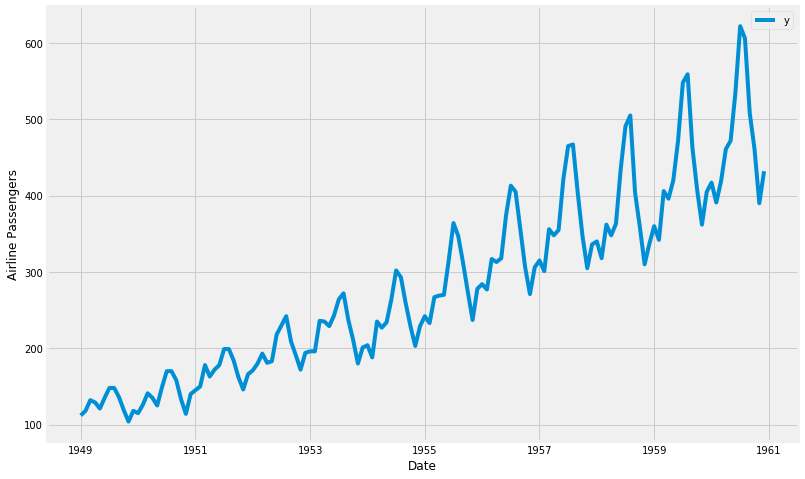

In [5]:
# matplotlib =>  1) matplotlib 2) pandas명령 3) seaborn(유용)
from matplotlib import pyplot as plt
ax = df.set_index('ds').plot(figsize=(12, 8)) # 가로, 세로 인치 단위
ax.set_ylabel('Airline Passengers')
ax.set_xlabel('Date')

plt.show()

In [6]:
my_model = Prophet(interval_width = 0.95)
my_model.fit(df)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\minsung\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [7]:
# 예측을 위한 공간할당
future_dates = my_model.make_future_dataframe(periods = 36, freq = 'MS')
future_dates.tail()

,ds
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01
179,1963-12-01


In [8]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
175,1963-08-01,650.196055,609.760461,694.077798
176,1963-09-01,602.930021,558.954534,646.330849
177,1963-10-01,566.711999,522.642519,612.848753
178,1963-11-01,534.873398,493.665161,577.761486
179,1963-12-01,564.479864,521.880032,608.639233


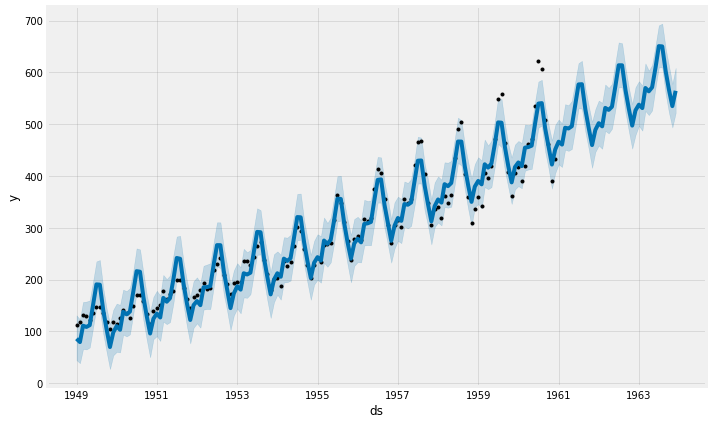

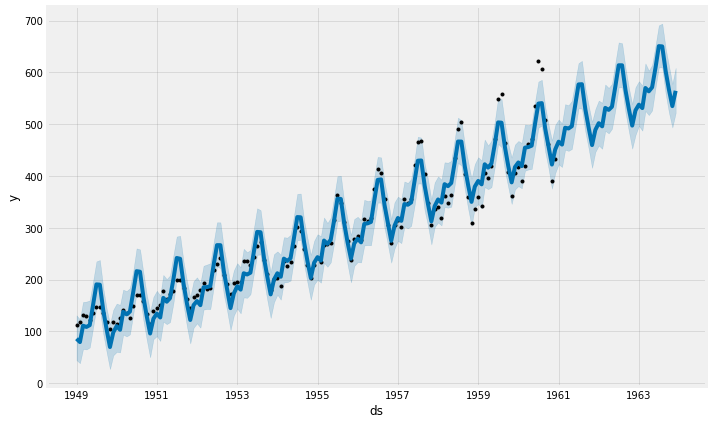

In [9]:
my_model.plot(forecast, uncertainty=True)

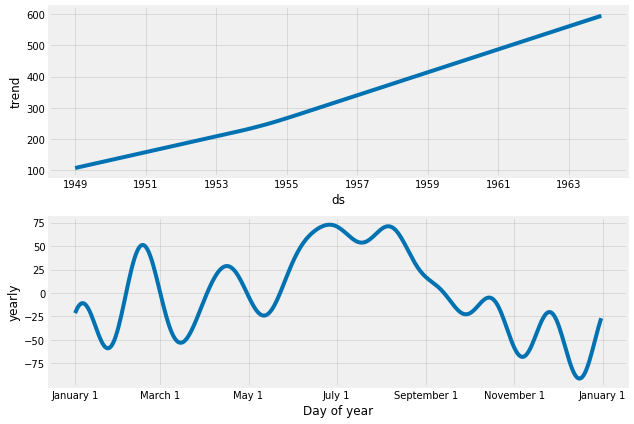

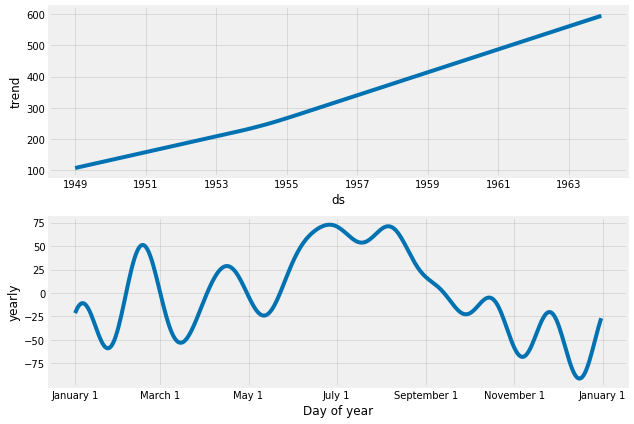

In [10]:
# uncertainty :
# trend, seasonality estimates, additional observaiton noise.
my_model.plot_components(forecast)

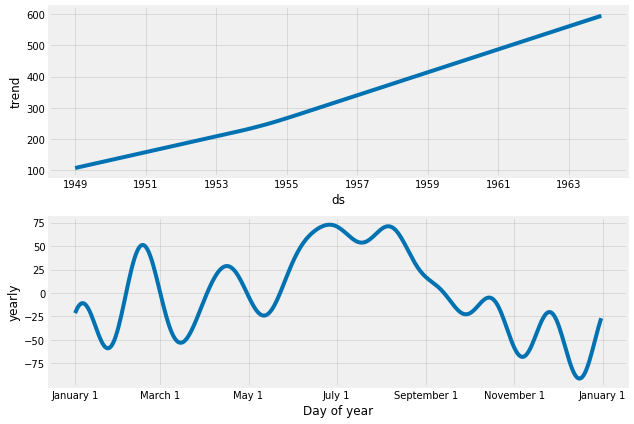

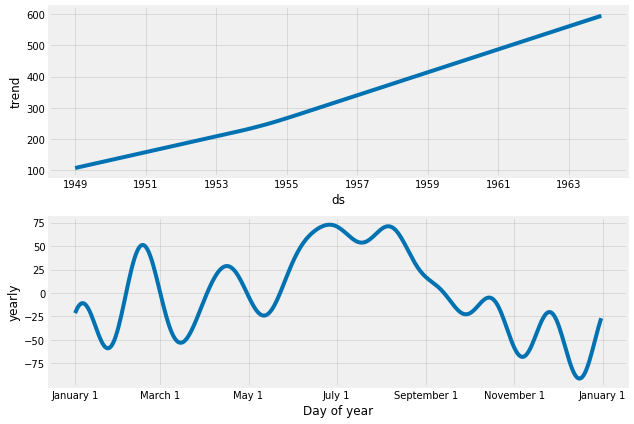

In [11]:
my_model.plot_components(forecast)

In [12]:
# 서울시청
# R에서 자동 : leaflet => Folium

In [18]:
import folium
map_osm = folium.Map(location = [37.565711, 126.978090])

In [19]:
map_osm.save('./tmp/map.html')

In [15]:
folium.Map(location=[37.565711, 126.978090],
          tiles = 'Stamen Toner',
          zoom_start = 13)

In [20]:
map_1 = folium.Map(location=[37.565711, 126.978090],
                  zoom_start=12,
                  tiles='Stamen Terrain')
folium.Marker([37.565711, 126.978090], popup = '서울시청').add_to(map_1)
folium.Marker([37.565711, 126.978090],
             popup = '서울시청및',
             icon = folium.Icon(icon='cloud')
             ).add_to(map_1)
map_1

In [ ]:
# seaborn 분포함수

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


C:\Users\minsung\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


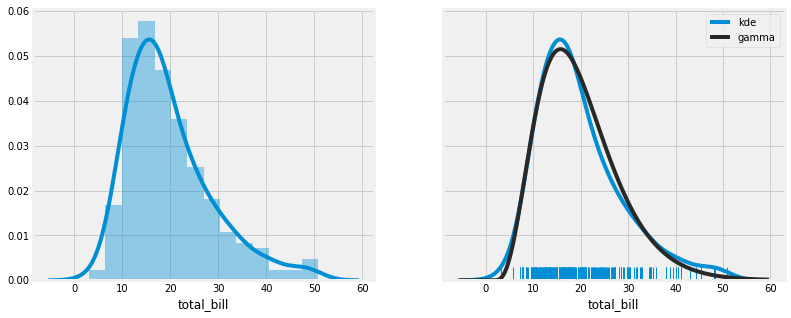

In [21]:
# dist : distribution 분포
%matplotlib inline
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt # 출력시 ax2
import seaborn as sns

# 데이터 지원 , statmodels => R을 그대로 구현
tips = sns.load_dataset('tips')
tips

f, (ax1, ax2) = plt.subplots(1, 2,
                            figsize = (12, 5),
                            sharey = True) # 
print(tips.describe())
# 분포함수를 출력
sns.distplot(tips.total_bill,
            ax=ax1,
            hist=True) # hist : histogram
sns.distplot(tips.total_bill,
            ax=ax2,
            hist=False,
            kde=True,
            rug=True, # 데이터의 밀집도
            fit=stats.gamma, # gamma pdf
            fit_kws=dict(label='gamma'),
            kde_kws=dict(label='kde'))
ax2.legend()

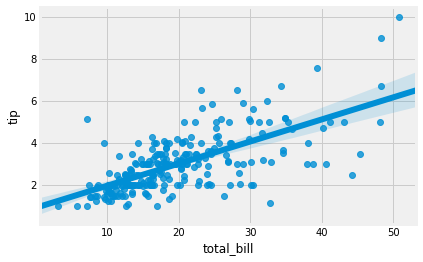

In [22]:
# regression plotting
sns.regplot(x="total_bill", y="tip", data=tips)

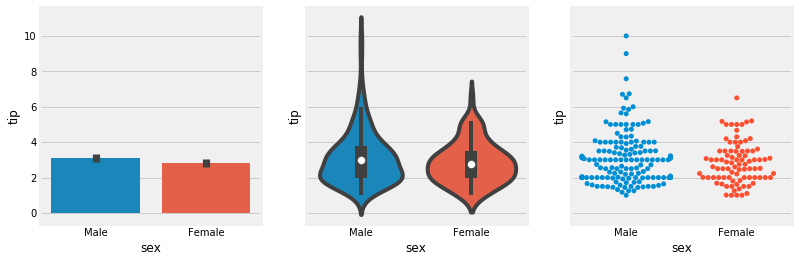

In [23]:
f, (ax1, ax2, ax3) = plt.subplots(
1, 3, figsize = (12, 4), sharey = True)
sns.barplot(x='sex', y='tip', data=tips, ax=ax1)
sns.violinplot(x='sex', y='tip', data=tips, ax=ax2) # 데이터분포모양까지 확인
# multiple distributions of data at once
sns.swarmplot(x='sex', y='tip', data=tips, ax=ax3)

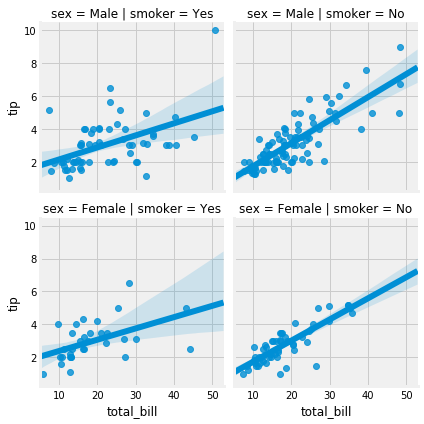

In [24]:
# 화면분할
# col, row에 들어오는 것이 범주형데이터 :
g = sns.FacetGrid(tips, col = 'smoker', row = 'sex')
g.map(sns.regplot, 'total_bill', 'tip')

In [25]:
import matplotlib as mpl
mpl.style.use('fivethirtyeight')
df = pd.read_csv('Pokemon.csv', index_col = 0)
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [26]:
pkmn_type_colors = ['#78C850',  
                    '#F08030',  
                    '#6890F0',  
                    '#A8B820',  
                    '#A8A878',  
                    '#A040A0',  
                    '#F8D030',  
                    '#E0C068',  
                    '#EE99AC',  
                    '#C03028',  
                    '#F85888',  
                    '#B8A038',  
                    '#705898',  
                    '#98D8D8',  
                    '#7038F8',  
                   ] 

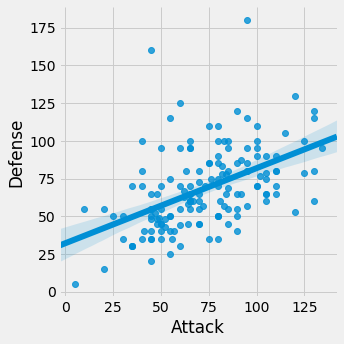

In [27]:
sns.lmplot(x='Attack', y='Defense', data=df)

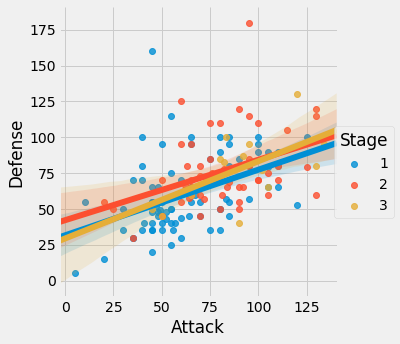

In [28]:
sns.lmplot(x='Attack', y='Defense', data=df, fit_reg = True,
          hue = 'Stage')

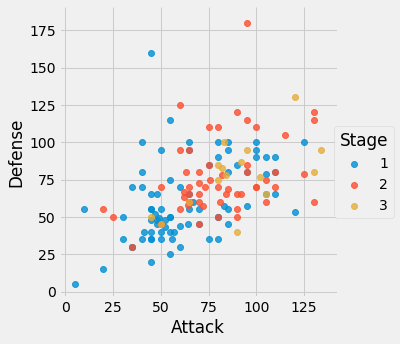

In [29]:
sns.lmplot(x='Attack', y='Defense', data=df, fit_reg = False,
          hue = 'Stage')

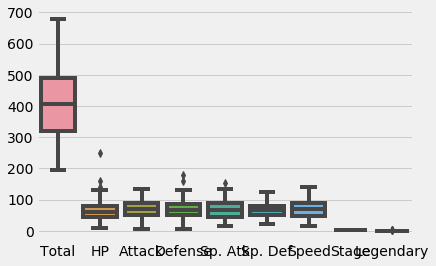

In [30]:
sns.boxplot(data=df)

           Name    Type 1   Type 2   HP  Attack  Defense  Sp. Atk  Sp. Def  \
#                                                                            
1     Bulbasaur     Grass   Poison   45      49       49       65       65   
2       Ivysaur     Grass   Poison   60      62       63       80       80   
3      Venusaur     Grass   Poison   80      82       83      100      100   
4    Charmander      Fire      NaN   39      52       43       60       50   
5    Charmeleon      Fire      NaN   58      64       58       80       65   
6     Charizard      Fire   Flying   78      84       78      109       85   
7      Squirtle     Water      NaN   44      48       65       50       64   
8     Wartortle     Water      NaN   59      63       80       65       80   
9     Blastoise     Water      NaN   79      83      100       85      105   
10     Caterpie       Bug      NaN   45      30       35       20       20   
11      Metapod       Bug      NaN   50      20       55       2

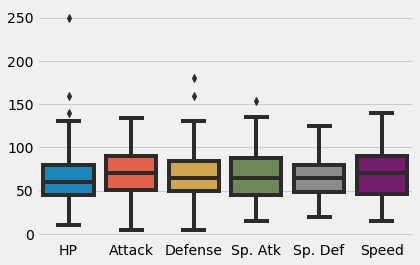

In [31]:
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
print(stats_df)

sns.boxplot(data=stats_df)

In [32]:
pkmn_type_colors = ['#78C850',  
                    '#F08030',  
                    '#6890F0',  
                    '#A8B820',  
                    '#A8A878',  
                    '#A040A0',  
                    '#F8D030',  
                    '#E0C068',  
                    '#EE99AC',  
                    '#C03028',  
                    '#F85888',  
                    '#B8A038',  
                    '#705898',  
                    '#98D8D8',  
                    '#7038F8',  
                   ] 

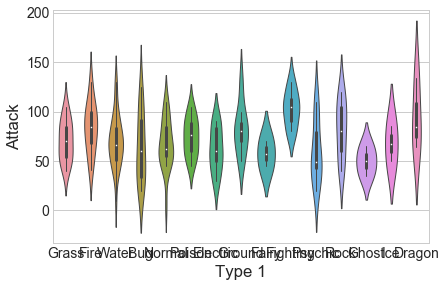

In [33]:
sns.set_style('whitegrid') # darkgrid, whitegrid, dark, white, ticks
# sns.set_style("ticks", {"xtick.major.size":10, "ytick.major.size": 10})
sns.violinplot(x='Type 1', y='Attack', data=df, palettes = pkmn_type_colors, linewidth=1)

               HP    Attack   Defense   Sp. Atk   Sp. Def     Speed
HP       1.000000  0.306768  0.119782  0.236649  0.490978 -0.040939
Attack   0.306768  1.000000  0.491965  0.146312  0.369069  0.194701
Defense  0.119782  0.491965  1.000000  0.187569  0.139912 -0.053252
Sp. Atk  0.236649  0.146312  0.187569  1.000000  0.522907  0.411516
Sp. Def  0.490978  0.369069  0.139912  0.522907  1.000000  0.392656
Speed   -0.040939  0.194701 -0.053252  0.411516  0.392656  1.000000


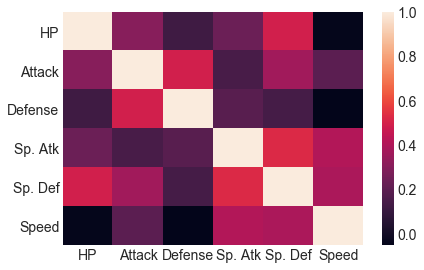

In [34]:
corr = stats_df.corr()
print(corr)
sns.heatmap(corr)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

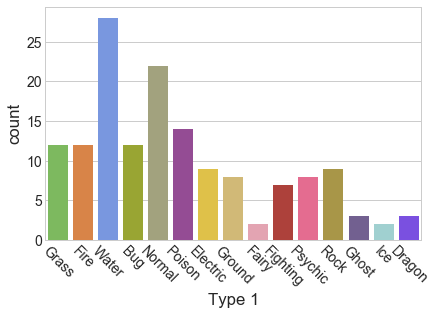

In [35]:
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
plt.xticks(rotation=-45)

C:\Users\minsung\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\minsung\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


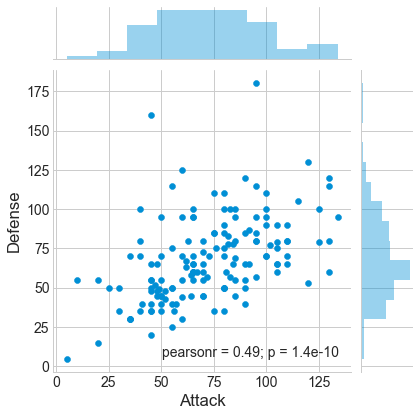

In [36]:
sns.jointplot(x='Attack', y='Defense', data=df)

C:\Users\minsung\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\minsung\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


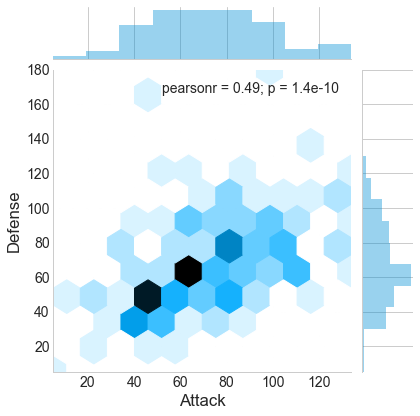

In [37]:
# kind {"scatter" | "reg" | "resid" | "kde" | "hex"}
sns.jointplot(x='Attack', y='Defense', kind="hex", data=df)

C:\Users\minsung\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\minsung\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


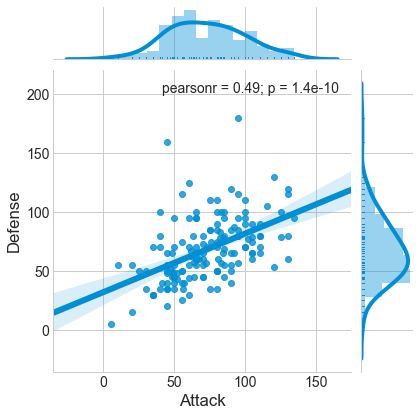

In [38]:
sns.jointplot(x='Attack', y='Defense',
             marginal_kws = dict(bins=15, rug=True),
             kind="reg", data=df)

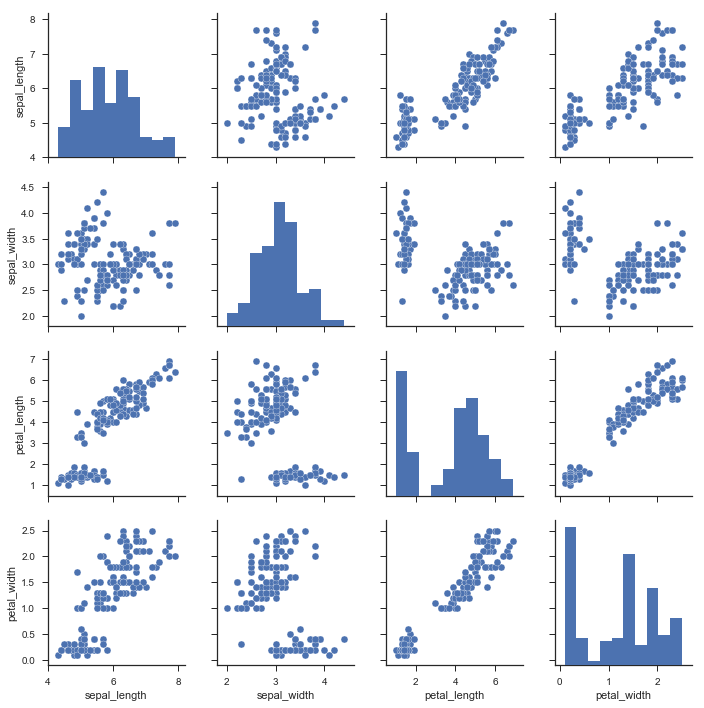

In [39]:
import seaborn as sns; sns.set(style="ticks", color_codes = True)
iris = sns.load_dataset("iris")
g = sns.pairplot(iris)

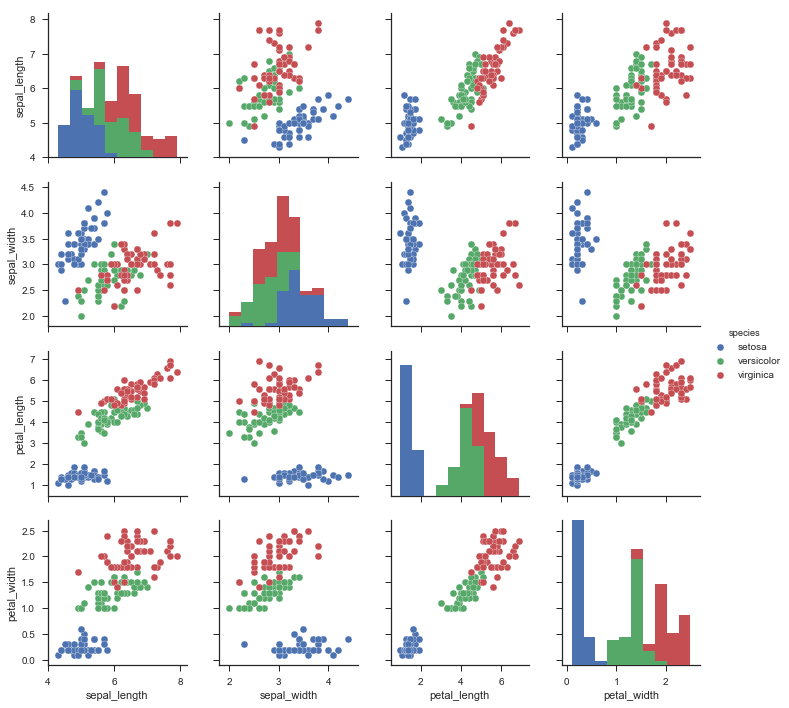

In [40]:
g = sns.pairplot(iris, hue="species")

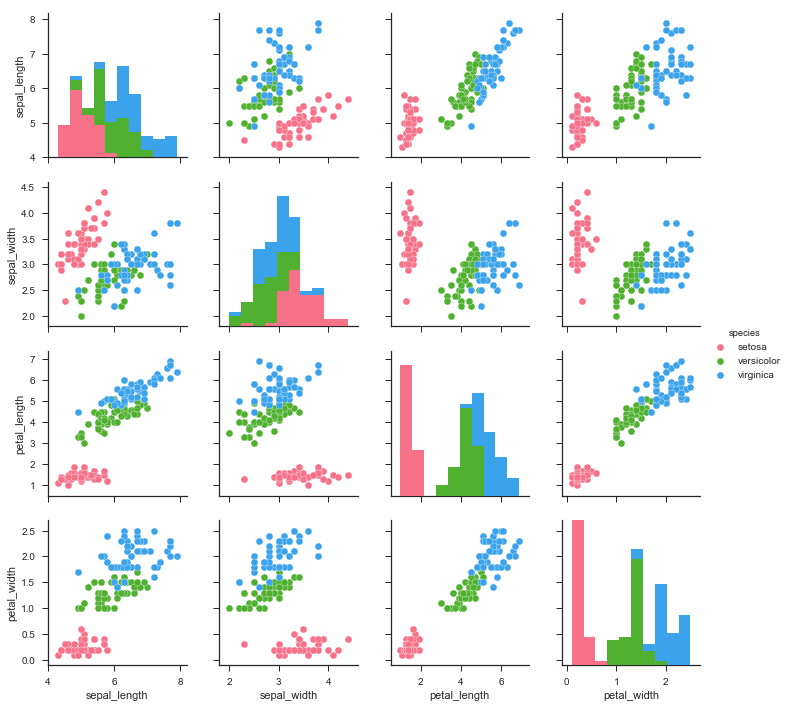

In [41]:
g = sns.pairplot(iris, hue = "species", palette = "husl")

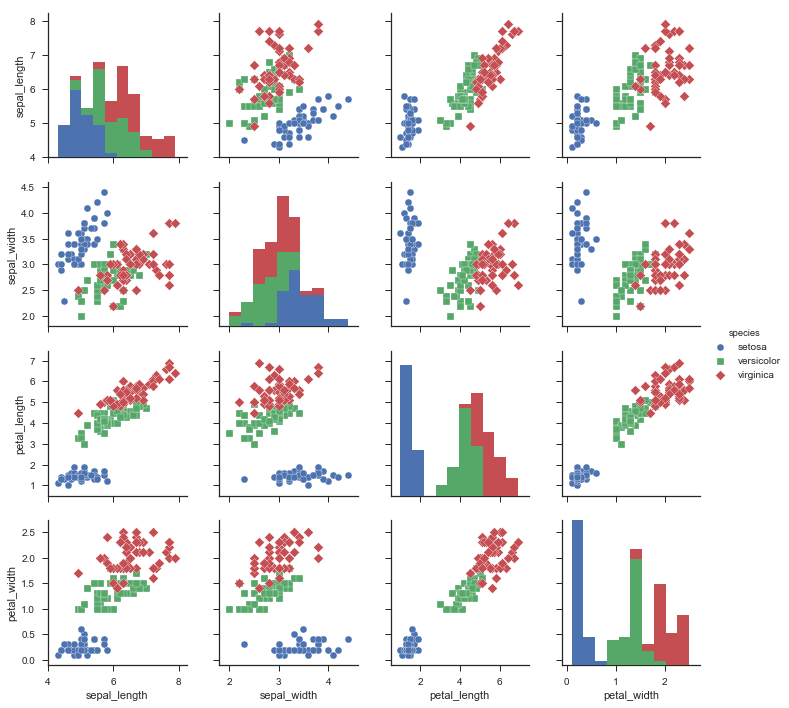

In [42]:
g = sns.pairplot(iris, hue="species", markers=["o", "s", "D"])

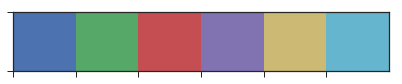

In [43]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

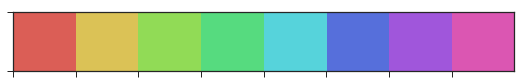

In [44]:
sns.palplot(sns.color_palette("hls", 8))

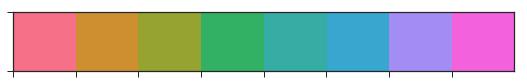

In [45]:
sns.palplot(sns.color_palette("husl", 8))

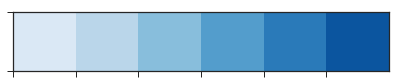

In [46]:
sns.palplot(sns.color_palette("Blues"))

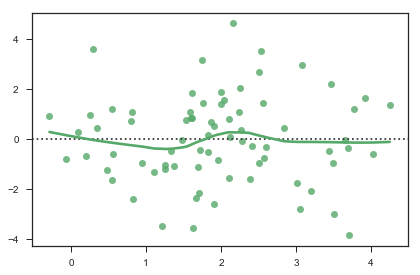

In [47]:
rs = np.random.RandomState(7)
x = rs.normal(2, 1, 75)
y = 2 + 1.5 * x + rs.normal(0, 2, 75)
sns.residplot(x, y, lowess = True, color = "g")

In [48]:
import pymongo
from pymongo import MongoClient
client = MongoClient()
client = MongoClient('192.168.0.152', 27017)
db=client.scorn
collection = db.inventory

In [49]:
items = collection.find({"item":"canvas"})
for item in items:
    print( item.get("qty") )

270


In [50]:
items = collection.find().sort("item", pymongo.DESCENDING).limit(10)
for item in items:
    print(item.get("item",), item.get("qty",0))

postcard 45.0
planner 175.0
notebook 50.0
notebook 0
journal 25.0
journal 0
canvas 270


In [52]:
import copy
items = collection.find({"item":"canvas"})
new_items = copy.deepcopy(items)

In [53]:
new_items["qty"]=2000
new_items
collection.update({"item":"canvas"}, new_items, safe=True)

TypeError: 'Cursor' object does not support item assignment

In [54]:
import datetime
connection = MongoClient('192.168.0.152', 27017)
db = connection.acorn
emp = db.employees # 테이블이 없으면 자동 생성

In [55]:
emp.insert_many([{"name": "에이콘",
                  "date": datetime.datetime(2017, 9 ,23, 11, 14 )},
{"name": "종로구", "date": datetime.datetime(2017, 9, 23, 10, 45)}])

In [56]:
import pprint
item = emp.find_one()
print(item['name'])
pprint.pprint(item)

에이콘
{'_id': ObjectId('5b5eb64316545b1fb40067a8'),
 'date': datetime.datetime(2017, 9, 23, 11, 14),
 'name': '에이콘'}


In [57]:
# songs
import sys
import pymongo
SEED_DATA = [
    {
        'decade' : '1970s',
        'artist' : '송대관',
        'song' : '해뜰날',
        'weeksAtOne': 10
    },
    {
        'decade' : '1980s',
        'artist' : '나훈아',
        'song' : '영영',
        'weeksAtOne': 10
    },
    {
        'decade' : '1990s',
        'artist' : '조용필',
        'song' : '고추잠자리',
        'weeksAtOne': 16
    }
]

In [58]:
collection.update({"item":"canvas"}, {"$set":{"qty":270}})

C:\Users\minsung\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: update is deprecated. Use replace_one, update_one or update_many instead.
  """Entry point for launching an IPython kernel.


{'n': 1, 'nModified': 0, 'ok': 1.0, 'updatedExisting': True}

In [59]:
# CURD( insert, find, update, remove를 통해서 작업 )
url = 'mongodb://192.168.0.152:27017/acorn'
client = pymongo.MongoClient(url)
db = client.get_default_database()
songs = db['songs']
songs.insert_many(SEED_DATA)
query = {'artist':'송대관'}
songs.update(query, {'$set' : {'artist' : '송대관님'}})

cursor = songs.find({'weeksAtOne' : {'$gte':10}}).sort('decade', 1)

for doc in cursor:
    print(' %s 년대에, %s 가수: %s 가 연속 %d 주 동안 차트 1위'%
         (doc['decade'], doc['song'], doc['artist'], doc['weeksAtOne']))
    # 테이블 자체를 삭제할 때
db.drop_collection('songs')
client.close() # 반드시 호출해서 자원을 해제한다.

 1970s 년대에, 해뜰날 가수: 송대관님 가 연속 10 주 동안 차트 1위
 1980s 년대에, 영영 가수: 나훈아 가 연속 10 주 동안 차트 1위
 1990s 년대에, 고추잠자리 가수: 조용필 가 연속 16 주 동안 차트 1위


C:\Users\minsung\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: update is deprecated. Use replace_one, update_one or update_many instead.
  


In [ ]:
# 성적관리를 mongodb로 구현해 보세요
# python에서 데이터를 입출력및 데이터 수정 삭제 기능을 구현하시오

SyntaxError: invalid syntax (<ipython-input-60-532fe1cdd44b>, line 9)